In [429]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from collections import defaultdict
import pandas as pd

def bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment=[0,0]):
    # Initialize the system
    fitness = np.random.rand(n_species)
    threshold = 0.65
    gap_function_value = 0
    min_fitness = np.zeros(n_iterations - skip_iterations)
    fitness_history = []
    avalanche_sizes_local = []
    avalanche_sizes_global = []
    avalanche_activity_local = []
    avalanche_activity_global = []
    avalanche = False
    avalanche_size_local = 0
    avalanche_size_global = 0
    animate = True
    animation_list = []

    for i in range(n_iterations):
        # species with minimum fitness value
        min_index = np.argmin(fitness)

        # assign a new random fitness value to the selected species
        fitness[min_index] = np.random.rand()

        # check neighbors and update their fitness if below the threshold
        
        fitness[min_index - 1] = np.random.rand()
        
        if min_index < n_species - 1:
            fitness[min_index + 1] = np.random.rand()
        # periodic boundary
        elif min_index == n_species -1:
            fitness[0] = np.random.rand()

        min_fitness_value = np.min(fitness)
        # if min_fitness_value > gap_function_value:
        #     gap_function_value = min_fitness_value
        #     # print(f'{gap_function_value}, iteration: {i}')
        #     threshold = gap_function_value - 0.01
        
        # skip iterations to start at the critical state
        if i >= skip_iterations:
            fitness_history.append(fitness)
            

            # save minimum fitness for each iteration
            min_fitness[i - skip_iterations] = min_fitness_value

            # if avalanche in progress
            if min_fitness_value < threshold and avalanche == True:
                # seperate counter for local activity
                if min_index >= local_segment[0] and min_index < local_segment[1]:
                    avalanche_size_local += 1
                    avalanche_activity_local.append(i-skip_iterations)

                avalanche_size_global += 1
                avalanche_activity_global.append(i-skip_iterations)

                # add frame to animation
                if animate == True:
                    # print(f'animation append: {i - avalanche_start}')
                    animation_list.append(fitness)
                    # print(fitness)

            # start of new avalanche
            if min_fitness_value < threshold and avalanche == False:
                # print(f'avalanche start i: {i}')
                avalanche_start = i
                # avalanche_size += 1

                # animate avalanche
                if animate == True:
                    animation_list = []
                    # print(f'start animation:')
                    animation_list.append(fitness)
                avalanche = True

            # end of an avalanche
            if min_fitness_value >= threshold and avalanche == True:
                avalanche_size = i - avalanche_start
                # print(f'avalanche size: {avalanche_size}')

                avalanche_sizes_local.append(avalanche_size_local)
                avalanche_sizes_global.append(avalanche_size_global)
                avalanche_size_local = 0
                avalanche_size_global = 0
                avalanche = False

                # turn off animation only with a big avalanche
                if len(animation_list) > 50 and len(animation_list) < 1001 and animate == True:
                    # print(f'animation stop, avalanche size: {avalanche_size}')
                    # print(len(animation_list))
                    animate = False
                    


    return min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local, animation_list



In [430]:
# Run the Bak-Sneppen simulation
n_iterations = 1000000
skip_iterations = 200000
local_segment = [1,8]
n_species = 100
avalanche_sizes_local = [0,0]
animation_list = []

counter = 0
while sum(x != 0 for x in avalanche_sizes_local) < 1:
    counter += 1
    print(f'{counter}, {sum(x != 0 for x in avalanche_sizes_local)}', end='\r')
    min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local, animation_list = bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment)



In [420]:
# print(animation_list)

[array([0.71367594, 0.69187429, 0.56826732, 0.2836128 , 0.98481754,
       0.873794  , 0.86648758, 0.69725092, 0.71557411, 0.81706577,
       0.78887403, 0.7849693 , 0.93397423, 0.77082212, 0.87440395,
       0.96177695, 0.83526986, 0.93236897, 0.80259167, 0.88552828]), array([0.71367594, 0.69187429, 0.56826732, 0.2836128 , 0.98481754,
       0.873794  , 0.86648758, 0.69725092, 0.71557411, 0.81706577,
       0.78887403, 0.7849693 , 0.93397423, 0.77082212, 0.87440395,
       0.96177695, 0.83526986, 0.93236897, 0.80259167, 0.88552828]), array([0.71367594, 0.69187429, 0.56826732, 0.2836128 , 0.98481754,
       0.873794  , 0.86648758, 0.69725092, 0.71557411, 0.81706577,
       0.78887403, 0.7849693 , 0.93397423, 0.77082212, 0.87440395,
       0.96177695, 0.83526986, 0.93236897, 0.80259167, 0.88552828]), array([0.71367594, 0.69187429, 0.56826732, 0.2836128 , 0.98481754,
       0.873794  , 0.86648758, 0.69725092, 0.71557411, 0.81706577,
       0.78887403, 0.7849693 , 0.93397423, 0.77082212, 

In [421]:
all(all(x == sublist[0] for x in sublist) for sublist in animation_list)


False

87


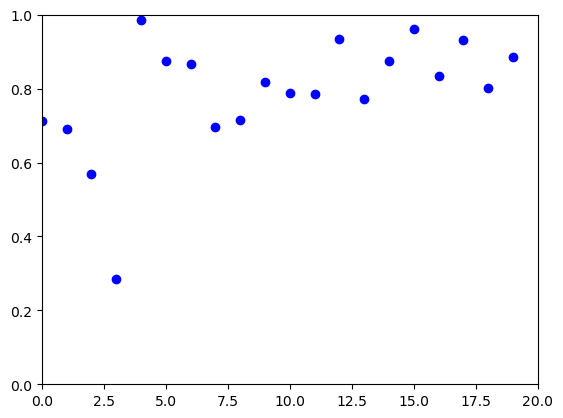

In [422]:
import matplotlib.animation as animation

# Sample x and y lists
species_locations = [[x for x in range(0,n_species)]] * len(animation_list)

print(len(animation_list))

# Set the frames per second (fps)
fps = 10

# Create a figure and axis
fig, ax = plt.subplots()

# Create an empty plot
points, = ax.plot([], [], 'bo')

# Set the axes limits
ax.set_xlim(0, n_species)
ax.set_ylim(0, 1)

# Function to update the plot for each frame
def update(frame):
    # Get the x and y values for the current frame
    y = animation_list[frame]
    x = species_locations[frame]

    # Update the data of the plot
    points.set_data(x, y)

    return points,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(animation_list), interval=1000/fps)

# Save the animation as an mp4 file
ani.save('animation.gif', writer='pillow')

# Display the animation
plt.show()

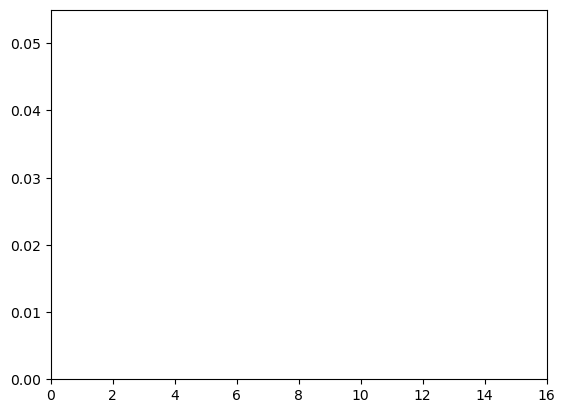

In [423]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Sample x and y lists for each frame
x_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]]
y_list = [[3, 2, 1], [6, 5, 4], [9, 8, 7], [12, 11, 10], [15, 14, 13]]

# Create a figure and axis
fig, ax = plt.subplots()

# Create an empty plot
points, = ax.plot([], [], 'bo')

# Set the axes limits
ax.set_xlim(0, 16)
ax.set_ylim(0, )

# Function to update the plot for each frame
def update(frame):
    # Get the x and y values for the current frame
    x = x_list[frame]
    y = y_list[frame]

    # Update the data of the plot
    points.set_data(x, y)

    return points,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(x_list), interval=200)
ani.save('test.gif', writer='pillow')


In [424]:

print([[x for x in range(3)]] * 5)

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]


66


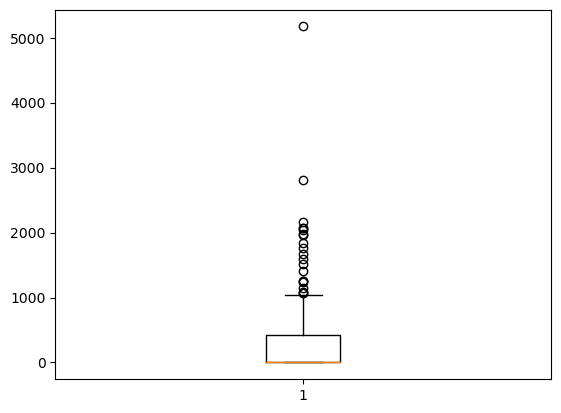

In [431]:
print(sum(x != 0 for x in avalanche_sizes_local))
plt.boxplot(avalanche_sizes_local)
plt.show()

Local avalanche activity

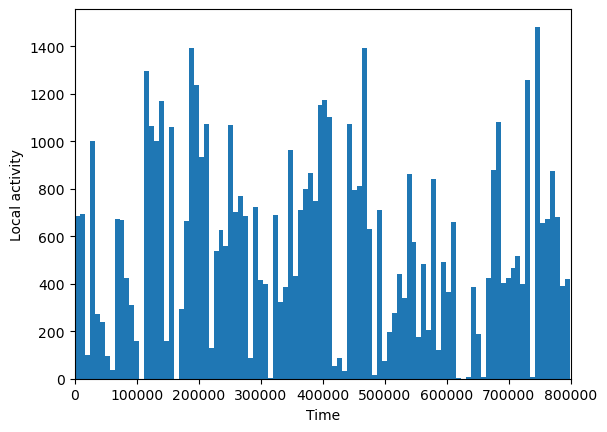

In [432]:
# plot avalanche activity in time
plt.hist(avalanche_activity_local, bins=100)
plt.xlim(0,n_iterations-skip_iterations)
plt.xlabel('Time')
plt.ylabel('Local activity')
plt.show()

Avalanche size distribution

[20, 4, 7, 4, 4, 1, 2, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 125, 135, 145, 155, 175, 205, 215, 225, 235, 245, 265, 335, 355, 385, 435, 535, 685, 725, 765, 805, 825, 915, 975, 1085, 1245, 1285, 1325, 1445, 1715, 1735, 1795, 1925, 2025, 2105, 2165, 2265, 2295, 2365, 2615, 2725, 2915, 3405, 3755, 3875, 4675, 5135, 5535, 5995, 6505, 6525, 6725, 6905, 6955, 7025, 7135, 8075, 8285, 8455, 8475, 9045, 9615, 11515, 11565, 12525, 12695, 12915, 14155, 14775, 15415, 15665, 15725, 15795, 16425, 17065, 17625, 18605, 18915, 19175, 19375, 23265, 23855, 24985, 27615, 29705, 32925, 37365, 41315]
142


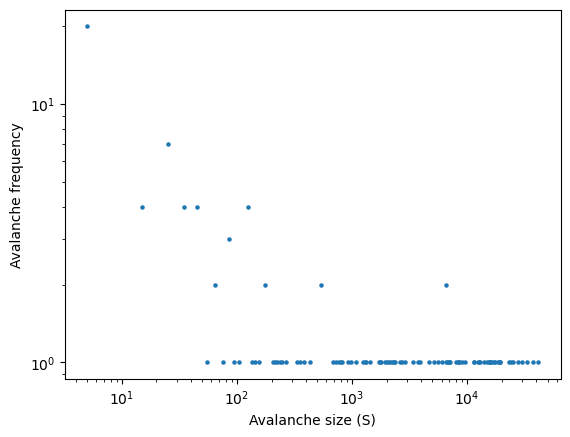

[0.14084507042253522, 0.028169014084507043, 0.04929577464788732, 0.028169014084507043, 0.028169014084507043, 0.007042253521126761, 0.014084507042253521, 0.007042253521126761, 0.02112676056338028, 0.007042253521126761, 0.007042253521126761, 0.028169014084507043, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.014084507042253521, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.014084507042253521, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.0070422535

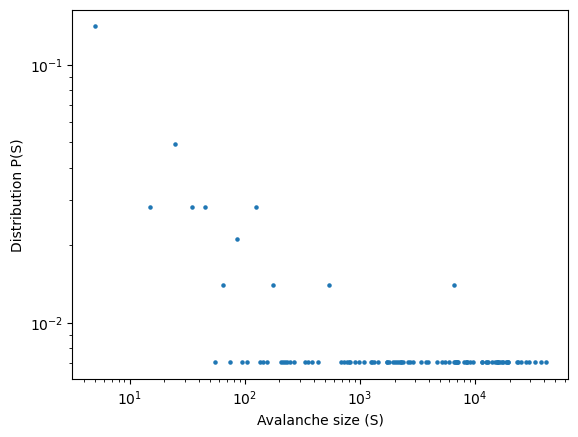

In [434]:
# bins of avalanche sizes
bins = [x for x in np.arange(0,np.max(avalanche_sizes_global),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_global) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_global, bins)



# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for i in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[i] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[i])
        bins_plot.append(all_bins[i])



print(avalanche_size_distribution_plot)
print(bins_plot)
print(len(avalanche_sizes_global))


plt.scatter(bins_plot, avalanche_size_distribution_plot, s=5)
# plt.hist(avalanche_sizes_global, bins=100)
plt.xlabel('Avalanche size (S)')
plt.ylabel('Avalanche frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()

# bins of avalanche sizes
bins = [x for x in np.arange(0,np.max(avalanche_sizes_global),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_global) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_global, bins)

# normalize (frequency => probability)
total_avalanches = len(avalanche_sizes_global)
avalanche_distribution = []
for avalanche in avalanche_size_distribution:
    avalanche_distribution.append(avalanche/total_avalanches)


# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for i in range(len(avalanche_distribution)):
    if avalanche_distribution[i] != 0:
        avalanche_size_distribution_plot.append(avalanche_distribution[i])
        bins_plot.append(all_bins[i])



print(avalanche_size_distribution_plot)
print(bins_plot)
print(len(avalanche_sizes_global))


plt.scatter(bins_plot, avalanche_size_distribution_plot, s=5)
# plt.hist(avalanche_sizes_global, bins=100)
plt.xlabel('Avalanche size (S)')
plt.ylabel('Distribution P(S)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# # mean avalanche size for each avalance size probability
# avalanche_size_bins = bins_plot
# avalanche_size_distribution_plot = avalanche_size_distribution_plot

# data_dict = defaultdict(list)

# for x, y in zip(avalanche_size_bins, avalanche_size_distribution_plot):
#     data_dict[y].append(x)

# mean_size_distribution = []
# mean_avalanche_sizes = []

# for y, x_list in data_dict.items():
#     mean_size_distribution.append(y)
#     mean_x = sum(x_list) / len(x_list)
#     mean_avalanche_sizes.append(mean_x)


# print('Mean of avalanche sizes for each avalanche size probability:')
# plt.scatter(mean_avalanche_sizes, mean_size_distribution, s=5)
# # plt.hist(avalanche_sizes_global, bins=100)
# plt.xlabel('Avalanche size (S)')
# plt.ylabel('Distribution P(S)')
# plt.xscale('log')
# plt.yscale('log')
# plt.show()

In [439]:
# run simulation for different system sizes to compare
system_sizes = [32, 128, 512, 2048]
n_iterations = 400000
skip_iterations = 200000

avalanche_sizes_list = []

for n_species in system_sizes:
    min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local, _ = bak_sneppen_1D(n_iterations, skip_iterations, n_species, local_segment)
    avalanche_sizes_list.append(avalanche_sizes_global)


ValueError: zero-size array to reduction operation maximum which has no identity

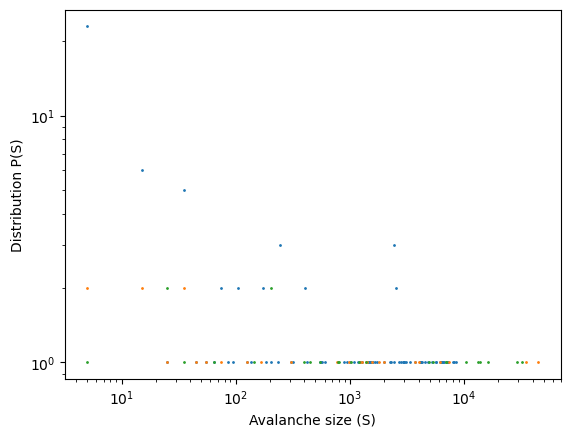

In [440]:
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins)
    

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    

    plt.scatter(bins_plot, avalanche_size_distribution_plot, label=f'N = {system_sizes[i]}', s=1)
    plt.xlabel('Avalanche size (S)')
    plt.ylabel('Distribution P(S)')
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()

# normalized version
for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins)
    
    # normalize (frequency => probability)
    total_avalanches = len(avalanche_sizes_list[i])
    avalanche_distribution = []
    for avalanche in avalanche_size_distribution:
        avalanche_distribution.append(avalanche/total_avalanches)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_distribution)):
        if avalanche_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    

    plt.scatter(bins_plot, avalanche_size_distribution_plot, label=f'N = {system_sizes[i]}', s=1)
    plt.xlabel('Avalanche size (S)')
    plt.ylabel('Distribution P(S)')
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()



average to make plot more line like

In [ ]:
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    avalanche_size_bins = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            avalanche_size_bins.append(all_bins[j])


    data_dict = defaultdict(list)

    for x, y in zip(avalanche_size_bins, avalanche_size_distribution_plot):
        data_dict[y].append(x)

    mean_size_distribution = []
    mean_avalanche_sizes = []

    for y, x_list in data_dict.items():
        mean_size_distribution.append(y)
        mean_x = sum(x_list) / len(x_list)
        mean_avalanche_sizes.append(mean_x)
    

    plt.scatter(mean_avalanche_sizes, mean_size_distribution, label=f'N = {system_sizes[i]}', s=5)
    # plt.plot(mean_avalanche_sizes, mean_size_distribution, label=f'N = {system_sizes[i]}')
    plt.xlabel('Avalanche size (S)')
    plt.ylabel('Distribution P(S)')
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()

Power law fit

302
302
70
70


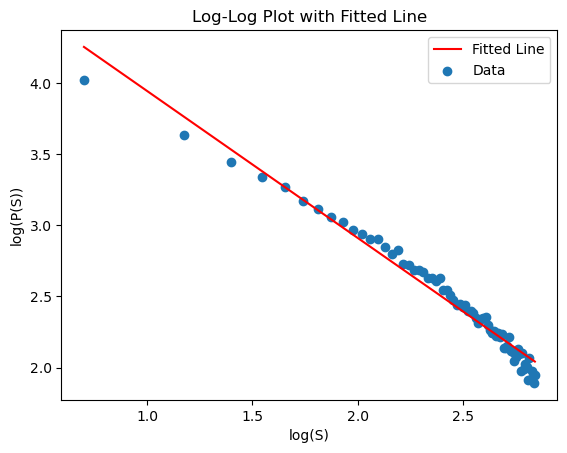

Exponent: -1.0325829090175775


In [272]:
import numpy as np
import matplotlib.pyplot as plt

bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


print(len(bins_plot))
print(len(avalanche_size_distribution_plot))


threshold = 700

bins_filtered = [value1 for value1 in bins_plot if value1 <= threshold]
avalanche_sizes_global_filtered = [value2 for value1, value2 in zip(bins_filtered, avalanche_size_distribution_plot) if value1 <= threshold]

print(len(bins_filtered))
print(len(avalanche_sizes_global_filtered))


# Take the logarithm of the filtered data
log_bins = np.log10(bins_filtered)
log_sizes = np.log10(avalanche_sizes_global_filtered)

# Fit a straight line through linear regression
coefficients = np.polyfit(log_bins, log_sizes, 1)
exponent = coefficients[0]

# Generate the fitted line
fit_x = np.linspace(min(log_bins), max(log_bins), 100)
fit_y = coefficients[0] * fit_x + coefficients[1]

# Plot the log-log data and the fitted line
plt.scatter(log_bins, log_sizes, label='Data')
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('log(S)')
plt.ylabel('log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)

In [262]:

filtered_list = [value for value in avalanche_sizes_list[3] if value <= 1400]
results = powerlaw.Fit(filtered_list)

# Print the estimated exponent and lower bound of the power law distribution
print("Estimated exponent (alpha):", results.power_law.alpha)
print("Estimated lower bound (xmin):", results.power_law.xmin)
print(f"exponent error: {results.power_law.sigma}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Estimated exponent (alpha): 3.1904519128912083
Estimated lower bound (xmin): 452.0
exponent error: 0.028607096200813503


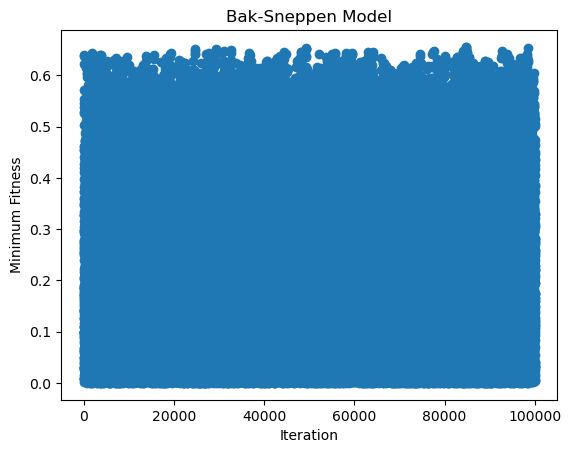

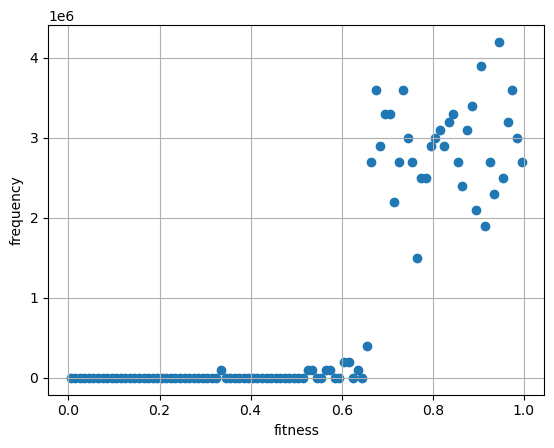

In [92]:

# Plot the evolution of the minimum fitness value
plt.scatter(range(n_iterations - skip_iterations), min_fitness)
plt.xlabel('Iteration')
plt.ylabel('Minimum Fitness')
plt.title('Bak-Sneppen Model')
plt.show()

bins = np.arange(0,1.01,0.01)
bins_plot = np.arange(0.005,1.005,0.01)
counts = np.zeros(len(bins)-1)

# Plot the distribution of fitness during the whole simulation
for fitness_slice in fitness_history:
    counts_slice, _ = np.histogram(fitness_slice, bins)
    counts = [x + y for x, y in zip(counts, counts_slice)]

# Plot the normalized distribution using a histogram
plt.scatter(bins_plot, counts)
plt.xlabel('fitness')
plt.ylabel('frequency')
plt.grid(True)
plt.show()


In [65]:
def bak_sneppen_2D(n_iterations, grid_size=50):
    # Initialize the system

    fitness = np.random.rand(grid_size, grid_size)
    threshold = 0.5
    evolution = np.zeros(n_iterations)

    # Simulation loop
    for i in range(n_iterations):
        # Find the site with the minimum fitness value
        min_index = np.argmin(fitness)

        # Assign a new random fitness value to the selected site
        fitness[min_index] = np.random.rand()

        # Check neighbors and update their fitness if below the threshold
        if min_index > 0 and fitness[min_index - 1] < threshold:
            fitness[min_index - 1] = np.random.rand()
        if min_index < n_species - 1 and fitness[min_index + 1] < threshold:
            fitness[min_index + 1] = np.random.rand()

        # Record the minimum fitness value at each iteration
        evolution[i] = np.min(fitness)

    return evolution

# Run the Bak-Sneppen simulation
n_iterations = 100000
evolution = bak_sneppen_2D(n_iterations)

# Plot the evolution of the minimum fitness value
plt.plot(range(n_iterations), evolution)
plt.xlabel('Iteration')
plt.ylabel('Minimum Fitness')
plt.title('Bak-Sneppen Model')
plt.show()


In [20]:
l1 = np.array([1,2,3])
l2 = np.array([1,2,3])

l1 = [x + y for x, y in zip(l1, l2)]
print(l1)

[2, 4, 6]


2D grid

In [ ]:
    fitness_grid = np.random.rand(grid_size, grid_size)
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

def bak_sneppen_2D(n_iterations, skip_iterations, grid_size, local_segment=[0,0]):
    # Initialize the system
    threshold = 0.3
    gap_function_value = 0
    min_fitness = np.zeros(n_iterations - skip_iterations)
    fitness_history = []
    avalanche_sizes_local = []
    avalanche_sizes_global = []
    avalanche_activity_local = []
    avalanche_activity_global = []
    avalanche = False
    avalanche_size_local = 0
    avalanche_size_global = 0

    for i in range(grid_size):
        for j in range(grid_size):
            # species with minimum fitness value
            min_indeces = np.unravel_index(np.argmin(fitness_grid), fitness_grid.shape)

            # assign a new random fitness value to the selected species
            fitness_grid[min_indeces[0] + 1 % grid_size][min_indeces[1] % grid_size] = np.random.rand()

            # check neighbors and update their fitness if below the threshold
            fitness_grid[min_ind - 1] = np.random.rand()
            if min_indeces[1] < n_species - 1:
                fitness_grid[min_index + 1] = np.random.rand()
            # periodic boundary
            elif min_index == n_species -1:
                fitness[0] = np.random.rand()

            min_fitness_value = np.min(fitness)
            # if min_fitness_value > gap_function_value:
            #     gap_function_value = min_fitness_value
            #     # print(f'{gap_function_value}, iteration: {i}')
            #     threshold = gap_function_value - 0.01
            
            # skip iterations to start at the critical state
            if i >= skip_iterations:
                fitness_history.append(fitness)
                

                # save minimum fitness for each iteration
                min_fitness[i - skip_iterations] = min_fitness_value

                # if avalanche in progress
                if min_fitness_value < threshold and avalanche == True:
                    # seperate counter for local activity
                    if min_index >= local_segment[0] and min_index < local_segment[1]:
                        avalanche_size_local += 1
                        avalanche_activity_local.append(i-skip_iterations)

                    avalanche_size_global += 1
                    avalanche_activity_global.append(i-skip_iterations)

                # start of new avalanche
                if min_fitness_value < threshold and avalanche == False:
                    # print(f'avalanche start i: {i}')
                    # avalanche_size += 1
                    avalanche = True

                # end of an avalanche
                if min_fitness_value >= threshold and avalanche == True:
                    # print(f'avalanche end i: {i}')

                    avalanche_sizes_local.append(avalanche_size_local)
                    avalanche_sizes_global.append(avalanche_size_global)
                    avalanche_size_local = 0
                    avalanche_size_global = 0
                    avalanche = False


    return min_fitness, fitness_history, avalanche_sizes_global, avalanche_sizes_local, avalanche_activity_global, avalanche_activity_local



In [308]:
fitness_grid = np.random.rand(5, 5)

min_index = np.unravel_index(np.argmin(fitness_grid), fitness_grid.shape)
print(fitness_grid)
print(min_index)
print(fitness_grid[min_indeces[0]][min_indeces[1]])

[[0.98150591 0.52179437 0.95875137 0.51393419 0.493861  ]
 [0.33508272 0.78117733 0.3882361  0.31336728 0.8530202 ]
 [0.25893778 0.03383369 0.62464941 0.42750029 0.27585937]
 [0.07098921 0.18209967 0.13530432 0.49738393 0.6439877 ]
 [0.2091695  0.28133893 0.75248753 0.45477995 0.00647829]]
(4, 4)
0.00647829132266009
